##### [< Forrige](2%20-%20funksjoner.ipynb)     |     [Neste >](3%20-%20funksjoner%20med%20plot.ipynb)

# 3 - matplotlib

Det er fint å kunne lage funksjoner i Python, men det er enda bedre å *se* dem. Vi skal nå se på hvordan vi kan tegne resultatet av funksjoner i et diagram ved hjelp av pakken matplotlib. Vi starter med å *importere* `matplotlib` og `numpy`:

In [3]:
import numpy as np
from matplotlib import pyplot as plt

### Eksempel med bankinnskudd

Vi begynner med å tegne opp funksjonen for et bankinnskud fra forrige forelesning. Om banken din legger til renten én gang i året og renten er r, så er bankinnskuddet på x=100 om T år med n forrentninger per år gitt som  $x\cdot (1+\frac{r}{n})^{T\cdot n}$, som vi kan programmere slik:

In [5]:
def account_balance(x,r,T,n):
    return x*(1+r/n)**(T*n)

Om renten er 20%=0.2, innskuddet er 100 som forrentes årlig, så kan vi tegne innskuddsfunksjonen fram til år 10 som

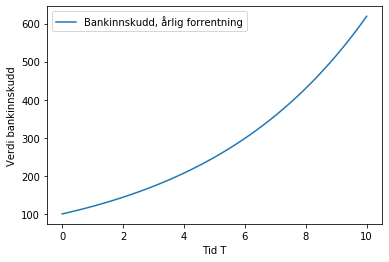

In [6]:
#1. Checking developement over 20 years, with 100 data points
T = np.linspace(0,10,100)

#2. initiating the function:
fig,ax=plt.subplots()

#3. adding axis lables:
ax.set_ylabel('Verdi bankinnskudd')
ax.set_xlabel('Tid T')

#4. plotting the function:
ax.plot(T, account_balance(100,0.2,T,1),          label='Bankinnskudd, årlig forrentning')

#5. adding legend in the upper left corner:
ax.legend(loc='upper left')

Det som skjer over er altså at vi

1. Definerer for hvilke verdier vi skal tegne og hvor mange punkter. Her ser vi at vi tegner hundre punkter i intervallet 0 til ti
2. Lager to objekter `fig` og `ax` som brukes til å tegne grafene. 
3. Definerer hva som skal være på x og y-aksen
4. Plotter ved å sette inn punktene `T` og funksjonen `account_balance(100,0.2,T,1)` inn i funksjonen `ax.plot`
5. lager ettikett og plasserer den oppe til venstre

La oss nå tenke oss at banken legger til renter n ganger i året. O, n=12, så legger banken til renter måndedlig. Vi kan da regne ut bankinnskuddet ved ulik antall forrentninger ber år:

Differansen mellom årlig og daglig forrentning etter 20 år er 119.33


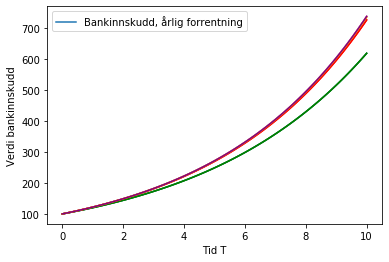

In [9]:
#plotting four graphs with different compounding:
ax.plot(T,       account_balance(100,0.2,T,1),          label='Kvartalsvis forrentning',     color='green')
ax.plot(T,       account_balance(100,0.2,T,12),         label='Måndedlig forrentning',       color='red')
ax.plot(T,       account_balance(100,0.2,T,52),         label='Ukentlig forrentning',        color='orange')
ax.plot(T,       account_balance(100,0.2,T,365),        label='Daglig forrentning',          color='purple')

#printing the nummerical difference between annual and daily compounding:
print(f"""Differansen mellom årlig og daglig forrentning etter 20 år er {
    np.round(
    account_balance(100,0.2,10,365)-account_balance(100,0.2,10,1)
        ,2)
}""")

#need to place the fig object last, in order for the figure to be displayed
fig

I stedet for å regne ut med daglig forrentning kan vi bruke kontinuerlig, som vil si at vi bruker eksponentialfunksjonen

Differansen mellom årlig og kontinuerlig forrentning etter 20 år er 0.4


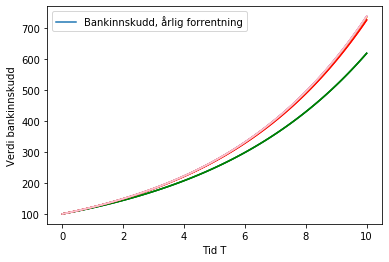

In [11]:
#defining the continous compounding function:
def account_balance_exponential(x,r,T):
    return x*np.exp(r*T)

#adding continious compounding to the prevoius plot
ax.plot(T,       account_balance_exponential(100,0.2,T),label='Kontinuerlig forrentet',      color='pink')


#printing the nummerical difference between continious and daily compounding:
print(f"""Differansen mellom årlig og kontinuerlig forrentning etter 20 år er {
    np.round(
   account_balance_exponential(100,0.2,10)- account_balance(100,0.2,10,365)
        ,2)
}""")

#need to place the fig object last, in order for the figure to be displayed
fig

Vi ser at selv om det lønner seg å forrente ofte, er det liten forskjell mellom daglig og kontinuerlig forretning. Likevel benytter vi ofte kontinuerlig forrentning i økonomifaget. Årsaken til det er at eksponenten og logaritmen er mye enklere å jobbe med matematisk enn potens og polynomer. 

# Googling

Det er umulig å huske hvordan alle funksjonene til alle pakkene i Python skal brukes, ikke minst fordi det er en konstant uvikling av slike pakker. Heldigvis lages de fleste pakker på en *pytonsk* måte, hvilket vil si at funksjoner og objekter fra forskjellige pakker og forfattere skal oppføre seg forutsigbart og ensartet. Helt selvforklarende er imidlertid ingen pakker. 

Den beste måten å finne ut hvordan du skal bruke en pakke, er derfor å google det du lurer på. Dette må gjøres på engelsk, siden stort sett alt av forum og dokumentasjon er på engelsk. 

La oss derfor ta matplotlib som eksempel. La oss si at du har glemt denne forelesningen og derfor skal finne ut hvordan du plotter en linje med matplotlib. Forsøkt å google `"matplotlib plot function"`. På første treff på Google er 

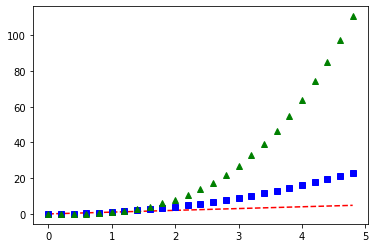

In [12]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')


## Eksempel med tilbud og etterspørsel

Vi definerer først tilbud og etterspørsel slik vi gjorde i forrige forelesning, men med litt andre tall:

In [13]:
def supply(x):
    return 0.5*x**2
    
def demand(x):
    return 100/(4+x)

Vi skal nå finne likhet mellom tilbud og etterspørsel grafisk ved å tegne opp begge funksjonene i samme diagram:

(0, 30)

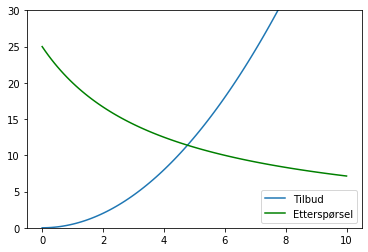

In [14]:
#drawing 100 points in the interval 0.0 to 5.0
x = np.linspace(0,10,100)

#drawing supply
plt.plot(x,supply(x),label='Tilbud')

#drawing demand
plt.plot(x,demand(x),color='green',label='Etterspørsel')

#adding legend:
plt.legend(loc='lower right')

#setting the range of y values (the price) to be between 0 and 30, so that we can more
#easily see the equilibrium price
plt.ylim((0,30))

#### Oppgave 1:
a) Forsøk å finne prisen og mengden i likevekt (der tilbud=etterspørsel) ved å bruke informasjonen i figuren
b) Gjør endringer i tilbud og etterspørselsfunksjonene og finn likevekt for disse. 

##### [< Forrige](2%20-%20funksjoner.ipynb)     |     [Neste >](3%20-%20funksjoner%20med%20plot.ipynb)